In [40]:
import sys

sys.path.append("../")
sys.path.append("../data/")
sys.path.append("../model_evaluation")

In [68]:
import pandas as pd

data = pd.read_csv("../results/gpt_pet_t2t.csv")
data.dropna(inplace=True)
t2t_1_t2t, t2t_2_t2t, m2m_1_t2t, m2m_2_t2t = (
    data["t2t_eval_1"],
    data["t2t_eval_2"],
    data["m2m_eval_1"],
    data["m2m_eval_2"],
)
data = pd.read_csv("../results/gpt_pet_m2m.csv")
data.dropna(inplace=True)
t2t_1_m2m, t2t_2_m2m, m2m_1_m2m, m2m_2_m2m = (
    data["t2t_eval_1"],
    data["t2t_eval_2"],
    data["m2m_eval_1"],
    data["m2m_eval_2"],
)
import pandas as pd

data = pd.read_csv("../results/gemini_pet_t2t.csv")
data.dropna(inplace=True)
t2t_1_t2t_gem, t2t_2_t2t_gem, m2m_1_t2t_gem, m2m_2_t2t_gem = (
    data["t2t_eval_1"],
    data["t2t_eval_2"],
    data["m2m_eval_1"],
    data["m2m_eval_2"],
)
data = pd.read_csv("../results/gemini_pet_m2m.csv")
data.dropna(inplace=True)
t2t_1_m2m_gem, t2t_2_m2m_gem, m2m_1_m2m_gem, m2m_2_m2m_gem = (
    data["t2t_eval_1"],
    data["t2t_eval_2"],
    data["m2m_eval_1"],
    data["m2m_eval_2"],
)

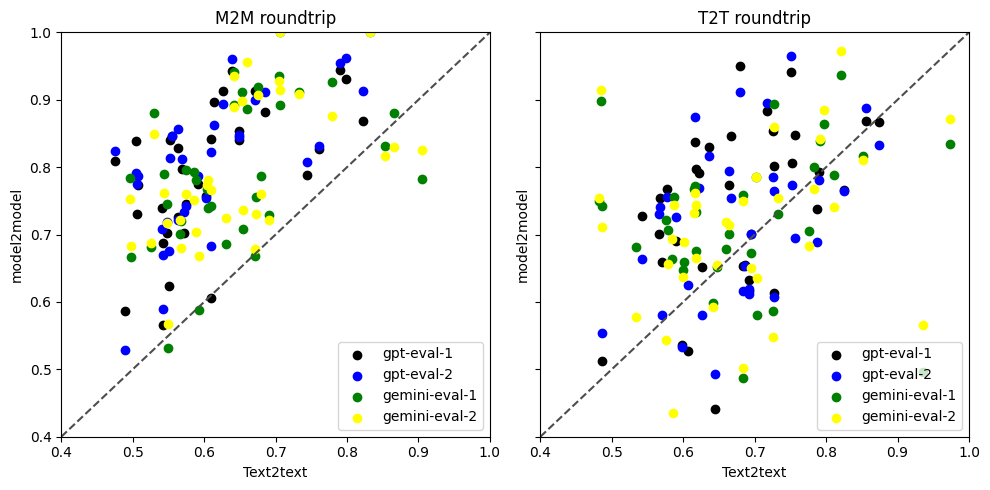

In [69]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# axs[0].scatter(t2t_1_m2m.values, m2m_1_m2m.values, marker="*", color="red")
# axs[0].scatter(t2t_1_m2m.values, m2m_2_m2m.values, marker="*", color="orange")
axs[0].scatter(t2t_2_m2m.values, m2m_1_m2m.values, marker="o", color="black", label="gpt-eval-1")
axs[0].scatter(t2t_2_m2m.values, m2m_2_m2m.values, marker="o", color="blue", label="gpt-eval-2")
axs[0].scatter(t2t_2_m2m_gem.values, m2m_1_m2m_gem.values, marker="o", color="green", label="gemini-eval-1")
axs[0].scatter(t2t_2_m2m_gem.values, m2m_2_m2m_gem.values, marker="o", color="yellow", label="gemini-eval-2")
axs[0].set_title("M2M roundtrip")
axs[0].set_xlim(0.4, 1)
axs[0].set_ylim(0.4, 1)
axs[0].set_xlabel("Text2text")
axs[0].set_ylabel("model2model")
axs[0].plot(axs[0].get_xlim(), axs[0].get_ylim(), ls="--", c=".3")

# axs[ 1].scatter(t2t_1_t2t.values, m2m_1_t2t.values, marker="*", color="red")
# axs[ 1].scatter(t2t_1_t2t.values, m2m_2_t2t.values, marker="*", color="orange")
axs[1].scatter(t2t_2_t2t.values, m2m_1_t2t.values, marker="o", color="black", label="gpt-eval-1")
axs[1].scatter(t2t_2_t2t.values, m2m_2_t2t.values, marker="o", color="blue", label="gpt-eval-2")
axs[1].scatter(t2t_2_t2t_gem.values, m2m_1_t2t_gem.values, marker="o", color="green", label="gemini-eval-1")
axs[1].scatter(t2t_2_t2t_gem.values, m2m_2_t2t_gem.values, marker="o", color="yellow", label="gemini-eval-2")
axs[1].set_title("T2T roundtrip")
axs[1].set_xlim(0.4, 1)
axs[1].set_ylim(0.4, 1)
axs[1].set_xlabel("Text2text")
axs[1].set_ylabel("model2model")
axs[1].plot(axs[1].get_xlim(), axs[1].get_ylim(), ls="--", c=".3")


# Make sure to use the legend individually for each subplot, if desired
for ax in axs.flat:
    ax.legend()

plt.tight_layout()
plt.show()

In [70]:
from scipy.stats import spearmanr

# t2t pipeline gpt
print(spearmanr(list(t2t_1_t2t.values), list(m2m_1_t2t.values)))
print(spearmanr(list(t2t_1_t2t.values), list(m2m_2_t2t.values)))
print(spearmanr(list(t2t_2_t2t.values), list(m2m_1_t2t.values)))
print(spearmanr(list(t2t_2_t2t.values), list(m2m_2_t2t.values)))

SignificanceResult(statistic=0.4428713754589048, pvalue=0.007715481559444616)
SignificanceResult(statistic=0.3530073198498013, pvalue=0.037519104476094585)
SignificanceResult(statistic=0.44873949579831934, pvalue=0.006854441220516596)
SignificanceResult(statistic=0.3798319327731093, pvalue=0.024410764091426933)


In [71]:
# m2m pipeline gpt
print(spearmanr(list(t2t_1_m2m.values), list(m2m_1_m2m.values)))
print(spearmanr(list(t2t_1_m2m.values), list(m2m_2_m2m.values)))
print(spearmanr(list(t2t_2_m2m.values), list(m2m_1_m2m.values)))
print(spearmanr(list(t2t_2_m2m.values), list(m2m_2_m2m.values)))

SignificanceResult(statistic=0.15943765806764382, pvalue=0.37547068972984354)
SignificanceResult(statistic=0.18238194289460516, pvalue=0.3096964324794244)
SignificanceResult(statistic=0.6460561497326204, pvalue=4.886901392055147e-05)
SignificanceResult(statistic=0.688836898395722, pvalue=9.332342305769623e-06)


In [75]:
# t2t pipeline gemini
print(spearmanr(list(t2t_1_t2t_gem.values), list(m2m_1_t2t_gem.values)))
print(spearmanr(list(t2t_1_t2t_gem.values), list(m2m_2_t2t_gem.values)))
print(spearmanr(list(t2t_2_t2t_gem.values), list(m2m_1_t2t_gem.values)))
print(spearmanr(list(t2t_2_t2t_gem.values), list(m2m_2_t2t_gem.values)))

SignificanceResult(statistic=0.3607319617587716, pvalue=0.030666774205996148)
SignificanceResult(statistic=0.3558363137063311, pvalue=0.03317684346211355)
SignificanceResult(statistic=0.26126126126126126, pvalue=0.12377587632461824)
SignificanceResult(statistic=0.3341055341055341, pvalue=0.04642280586372442)


In [76]:
# m2m pipeline gemini
print(spearmanr(list(t2t_1_m2m_gem.values), list(m2m_1_m2m_gem.values)))
print(spearmanr(list(t2t_1_m2m_gem.values), list(m2m_2_m2m_gem.values)))
print(spearmanr(list(t2t_2_m2m_gem.values), list(m2m_1_m2m_gem.values)))
print(spearmanr(list(t2t_2_m2m_gem.values), list(m2m_2_m2m_gem.values)))

SignificanceResult(statistic=0.24023734348771367, pvalue=0.15815029658082014)
SignificanceResult(statistic=0.336641599350809, pvalue=0.04468682481321618)
SignificanceResult(statistic=0.526065130647445, pvalue=0.0009829916526462323)
SignificanceResult(statistic=0.5778092418586691, pvalue=0.00022401422988630091)
